<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

## Task 1

CRIM: per capita crime rate by town  
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS: proportion of non-retail business acres per town.  
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX: nitric oxides concentration (parts per 10 million)  
RM: average number of rooms per dwelling  
AGE: proportion of owner-occupied units built prior to 1940  
DIS: weighted distances to five Boston employment centres  
RAD: index of accessibility to radial highways  
TAX: full-value property-tax rate per \\$10000  
PTRATIO: pupil-teacher ratio by town  
LSTAT: % lower status of the population  
MEDV: Median value of owner-occupied homes in $1000's

In [8]:
boston_df.drop(boston_df.columns[0], axis=1).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2

### For the "Median value of owner-occupied homes" provide a boxplot

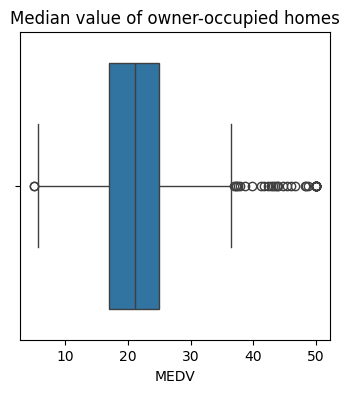

In [23]:
ax, fig = plt.subplots(figsize=(4,4))
ax = sns.boxplot(data=boston_df, x='MEDV')
ax.set_title('Median value of owner-occupied homes')
plt.show()

### Provide a  bar plot for the Charles river variable  

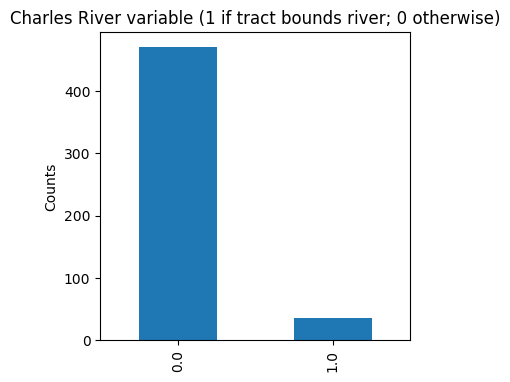

In [29]:
ax, fig = plt.subplots(figsize=(4,4))
ax = boston_df['CHAS'].value_counts().plot(kind='bar')
ax.set_title('Charles River variable (1 if tract bounds river; 0 otherwise)')
ax.set_ylabel('Counts')
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

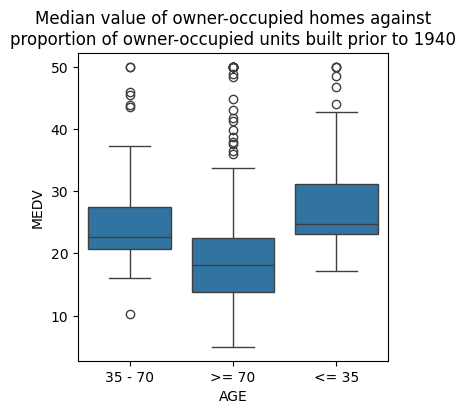

In [38]:
def f(x):
    if x <= 35:
        return '<= 35'
    elif 35<x<70:
        return '35 - 70'
    else:
        return '>= 70'
boston_df['generation'] = [f(x) for x in boston_df.AGE]

ax, fig = plt.subplots(figsize=(4,4))
ax = sns.boxplot(data=boston_df, x='generation', y='MEDV')
ax.set_title('Median value of owner-occupied homes against\nproportion of owner-occupied units built prior to 1940')
ax.set_xlabel('AGE')
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

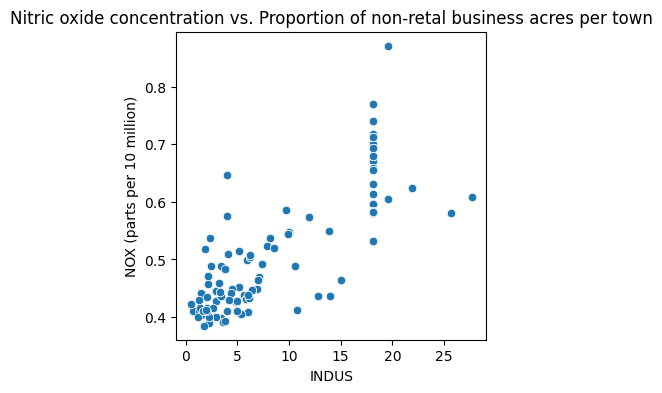

In [45]:
ax, fig = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
ax.set_title('Nitric oxide concentration vs. Proportion of non-retal business acres per town')
ax.set_ylabel('NOX (parts per 10 million)')
plt.show()

**Conclusion**: There appears to be a positive correlation betweent the two variables. This indicates that a higher proportion of non-retail business acres will increase the Nitric oxide concentration in a town.

### Create a histogram for the pupil to teacher ratio variable.

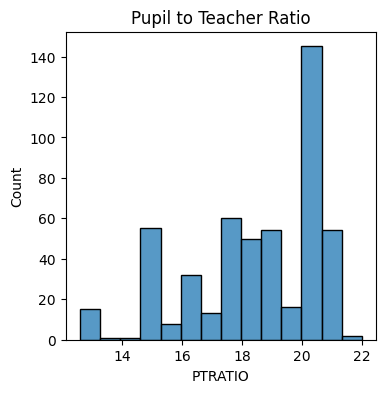

In [47]:
ax, fig = plt.subplots(figsize=(4,4))
ax = sns.histplot(data=boston_df, x='PTRATIO')
ax.set_title('Pupil to Teacher Ratio')
plt.show()

## Task 3

For each questions do the following:
1. State your hypothesis
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypothesis**: There is no statistically significant difference in median value of houses bounded by the Charles river or not.

In [48]:
bounded = boston_df.MEDV[boston_df.CHAS == 1]
unbounded = boston_df.MEDV[boston_df.CHAS == 0]
scipy.stats.ttest_ind(bounded, unbounded)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion**: The pvalue of the t-test is below 0.05 so we can regect the null hypothesis and conclude that there is a significant difference between the median value of houses bounded and unbounded by the Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis**: There is no statistically significant difference between median values of houses for different proportions of owner occupied units built prior to 1940.

In [49]:
young = boston_df.MEDV[boston_df.generation == '<= 35']
average = boston_df.MEDV[boston_df.generation == '35 - 70']
old = boston_df.MEDV[boston_df.generation == '>= 70']
scipy.stats.f_oneway(young, average, old)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion**: The pvalue of the test is below 0.05 so we can reject the null hypothesis and conclude that there is a significant difference between the median value of houses for different proportions of owner occupied units built prior to 1940.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis**: There is no statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [50]:
 scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion**: The pvalue of the test is below 0.05 so we can reject the null hypothesis and conclude that there is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis**: There is no impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [56]:
model = sm.OLS(boston_df.DIS, boston_df.MEDV).fit()
predictions = model.predict(boston_df.DIS)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    DIS   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):                   1.52e-146
Time:                        13:10:32   Log-Likelihood:                         -1127.4
No. Observations:                 506   AIC:                                      2257.
Df Residuals:                     505   BIC:                                      2261.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEDV           0.1526      0.004     37.149      0.000       0.145       0.161
==============================================================================
Omnibus:                       20.539   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.148
Skew:                           0.169   Prob(JB):                     1.57e-10
Kurtosis:                       4.424   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
np.sqrt(0.732)

0.8555699854482975

**Conclusion**: The pvalue of the test is above 0.05 so we cannot conclude that the relationship is significant.